<a href="https://colab.research.google.com/github/apchavezr/16.-Aprendizaje-Profundo-para-Ciencia-de-Datos/blob/main/Evaluacion_Modelo_Clasificacion_ROC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Evaluación de modelos de clasificación con visualización de curva ROC

## Objetivo del ejercicio

Evaluar un modelo de clasificación binaria utilizando métricas como precisión, recall, F1-score y el área bajo la curva ROC (AUC-ROC), para interpretar su rendimiento predictivo.

---

## Paso 1: importar las librerías necesarias

In [1]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt


## Paso 2: generar un conjunto de datos simulado

In [2]:
# Simulación de un conjunto de datos de clasificación binaria
X, y = make_classification(n_samples=1000, n_features=20,
                           n_informative=2, n_redundant=10,
                           n_classes=2, random_state=42)


## Paso 3: dividir los datos en entrenamiento y prueba

In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)


## Paso 4: entrenar un modelo de regresión logística

In [4]:
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)


LogisticRegression(solver='liblinear')

## Paso 5: realizar predicciones

In [5]:
# Predicción de clases (0 o 1)
y_pred = model.predict(X_test)

# Predicción de probabilidades (para AUC-ROC)
y_probs = model.predict_proba(X_test)[:, 1]


## Paso 6: generar el classification report y calcular AUC-ROC

In [6]:
# Reporte de métricas: precisión, recall, F1-score
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))

# Cálculo del AUC-ROC
auc = roc_auc_score(y_test, y_probs)
print("AUC-ROC:", round(auc, 4))


Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.87      0.83      0.85       162
           1       0.81      0.85      0.83       138

    accuracy                           0.84       300
   macro avg       0.84      0.84      0.84       300
weighted avg       0.84      0.84      0.84       300

AUC-ROC: 0.9043


**Clase 0:** El modelo predice correctamente el 87 % de las veces cuando dice que una instancia es de clase 0 (precisión). Sin embargo, solo identifica el 83 % de las verdaderas instancias de clase 0 (recall).

**Clase 1:** La precisión es de 81 %, lo que indica que hay más falsos positivos comparado con la clase 0. Sin embargo, el modelo recupera el 85 % de los casos reales de clase 1, mostrando un buen recall.

**F1-score:** Combina precisión y recall. Los valores de 0.85 y 0.83 para las clases 0 y 1, respectivamente, indican un buen balance entre ambas métricas.

## Paso 7: visualización gráfica de la curva ROC

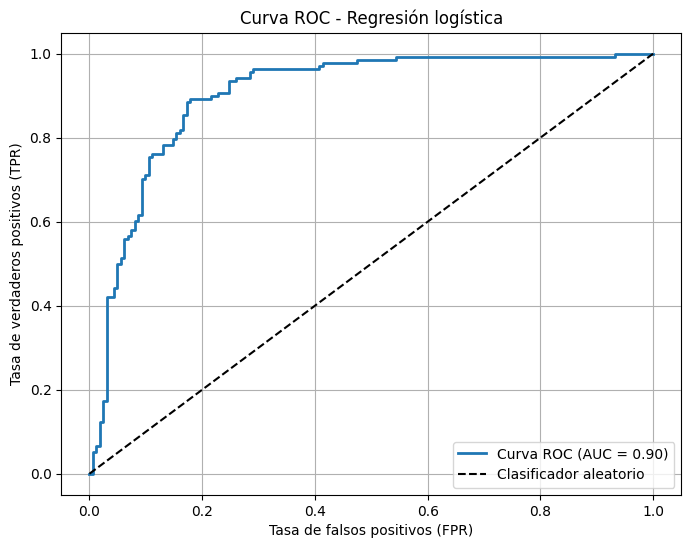

In [7]:
# Obtener valores de FPR, TPR y umbrales
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Curva ROC (AUC = {auc:.2f})', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', label='Clasificador aleatorio')
plt.xlabel('Tasa de falsos positivos (FPR)')
plt.ylabel('Tasa de verdaderos positivos (TPR)')
plt.title('Curva ROC - Regresión logística')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


## Interpretación de la gráfica

- **La línea diagonal punteada** representa un modelo que clasifica aleatoriamente (AUC = 0.5).
- **La curva ROC del modelo** debe situarse por encima de esa línea para indicar un buen desempeño.
- Un área bajo la curva (AUC) más próxima a 1 indica mejor capacidad de discriminación entre clases.